In [ ]:
!pip install gdown


In [ ]:
!gdown https://drive.google.com/uc?id=1DwVJORPgMQgiIBI6tjZDjRgv_ssy2QcR

Downloading...
From (original): https://drive.google.com/uc?id=1DwVJORPgMQgiIBI6tjZDjRgv_ssy2QcR
From (redirected): https://drive.google.com/uc?id=1DwVJORPgMQgiIBI6tjZDjRgv_ssy2QcR&confirm=t&uuid=5ad62f48-4e28-41da-9139-83b283f7f65e
To: /content/data.zip
100% 34.0M/34.0M [00:00<00:00, 185MB/s]


In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
   creating: data/test/
   creating: data/test/cardboard/
  inflating: data/test/cardboard/cardboard_321.jpg  
  inflating: data/test/cardboard/cardboard_322.jpg  
  inflating: data/test/cardboard/cardboard_323.jpg  
  inflating: data/test/cardboard/cardboard_324.jpg  
  inflating: data/test/cardboard/cardboard_325.jpg  
  inflating: data/test/cardboard/cardboard_326.jpg  
  inflating: data/test/cardboard/cardboard_327.jpg  
  inflating: data/test/cardboard/cardboard_328.jpg  
  inflating: data/test/cardboard/cardboard_329.jpg  
  inflating: data/test/cardboard/cardboard_330.jpg  
  inflating: data/test/cardboard/cardboard_331.jpg  
  inflating: data/test/cardboard/cardboard_332.jpg  
  inflating: data/test/cardboard/cardboard_333.jpg  
  inflating: data/test/cardboard/cardboard_334.jpg  
  inflating: data/test/cardboard/cardboard_335.jpg  
  inflating: data/test/cardboard/cardboard_336.jpg  
  inflating: data/test/cardboard/cardboard_337.

In [ ]:
!pip install jcopdl==1.1.1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.3 MB/s eta 0:00:00
  Created wheel for jcopdl: filename=jcopdl-1.1.1-py2.py3-none-any.whl size=12586 sha256=7fb4179043c64ba7e271aa62ec9616be05c8c88dce47032074b6d8a4f99638fc
  Stored

In [ ]:
import jcopdl
jcopdl.__version__

'1.1.1'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Data set dan dataloader

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:

bs = 64 #bacth size
crop_size = 224

train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(crop_size, scale=(0.7, 1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize(230),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = datasets.ImageFolder("/content/data/train", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("/content/data/test", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
label2cat = train_set.classes
label2cat


['cardboard', 'glass', 'metal', 'paper', 'plastic']

Arsitektur & Config

In [ ]:
from torchvision.models import mobilenet_v2

In [ ]:
mnet = mobilenet_v2(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 73.3MB/s]


In [ ]:
for param in mnet.parameters():
  param.requires_grad = False

In [ ]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
mnet.classifier = nn.Sequential(
    nn.Linear(1280, 5),
    nn.LogSoftmax(dim=1),
)

In [ ]:
class CustomMobilenetV2(nn.Module):
  def __init__(self,output_size):
    super().__init__()
    self.mnet = mobilenet_v2(pretrained=True)
    self.freeze()
    self.mnet.classifier = nn.Sequential(
        nn.Linear(1280, output_size),
        nn.LogSoftmax(dim=1),
    )

  def forward(self, x):
    return self.mnet(x)

  def freeze (self):
    for param in self.mnet.parameters():
      param.requires_grad = False

  def unfreeze(self):
    for param in self.mnet.parameters():
      param.requires_grad = True

In [ ]:
config = set_config({
    "output_size": len(train_set.classes),
    "batch_size": bs,
    "crop_size": crop_size,
})

Phase 1 Adaptation (lr standard + Patience kecil)

In [ ]:
model = CustomMobilenetV2(config.output_size).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, early_stop_patience=2, outdir="/content/model")

In [ ]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 1.1364 | Test_cost  = 0.7419 | Train_score = 0.5856 | Test_score = 0.7625 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.6803 | Test_cost  = 0.5914 | Train_score = 0.7856 | Test_score = 0.7950 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.5692 | Test_cost  = 0.5210 | Train_score = 0.8094 | Test_score = 0.8200 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.5001 | Test_cost  = 0.4875 | Train_score = 0.8294 | Test_score = 0.8225 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.4428 | Test_cost  = 0.4389 | Train_score = 0.8556 | Test_score = 0.8425 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.4465 | Test_cost  = 0.4468 | Train_score = 0.8494 | Test_score = 0.8450 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.3868 | Test_cost  = 0.4264 | Train_score = 0.8806 | Test_score = 0.8375 |
==> EarlyStop patience =  1 | Best test_score: 0.8450


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.3773 | Test_cost  = 0.4520 | Train_score = 0.8812 | Test_score = 0.8350 |
==> EarlyStop patience =  2 | Best test_score: 0.8450
==> Execute Early Stopping at epoch: 8 | Best test_score: 0.8450
==> Best model is saved at /content/model


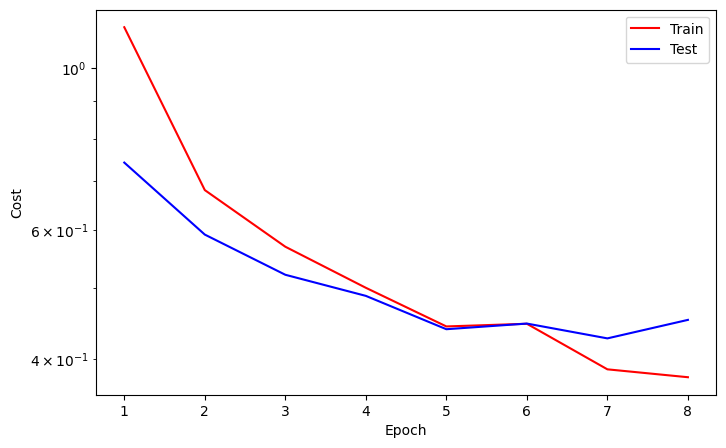

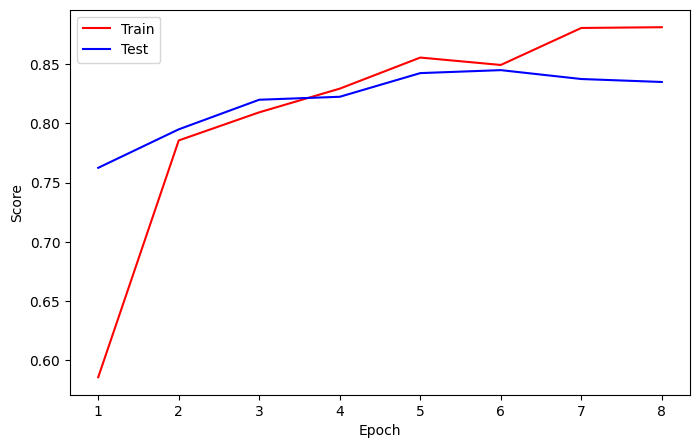

In [ ]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    #Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    #Checkpoint
    callback.save_checkpoint()

    #Runntime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    #Early stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break


Phase 2 Fine-Tuning (lr dikecilin + patience ditambah)

In [ ]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

callback.reset_early_stop()
callback.early_stop_patience = 5

Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.3866 | Test_cost  = 0.4030 | Train_score = 0.8794 | Test_score = 0.8550 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c7ae05e3c40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process


Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.3186 | Test_cost  = 0.3696 | Train_score = 0.9000 | Test_score = 0.8650 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.2932 | Test_cost  = 0.3503 | Train_score = 0.9163 | Test_score = 0.8725 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.2662 | Test_cost  = 0.3344 | Train_score = 0.9244 | Test_score = 0.8725 |
==> EarlyStop patience =  1 | Best test_score: 0.8725


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.2403 | Test_cost  = 0.3177 | Train_score = 0.9325 | Test_score = 0.8775 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.2158 | Test_cost  = 0.3041 | Train_score = 0.9431 | Test_score = 0.8825 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c7ae05e3c40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7c7ae05e3c40>  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive

    Traceback (most recent call last):
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__

    self._shutdown_workers()   
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
     if w.is_alive(): 
           ^ ^^^^^^^^^^^^^^^^^^^^^^^


Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.1980 | Test_cost  = 0.2958 | Train_score = 0.9456 | Test_score = 0.8900 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.1779 | Test_cost  = 0.2885 | Train_score = 0.9613 | Test_score = 0.8950 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.1620 | Test_cost  = 0.2779 | Train_score = 0.9656 | Test_score = 0.8925 |
==> EarlyStop patience =  1 | Best test_score: 0.8950


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.1599 | Test_cost  = 0.2763 | Train_score = 0.9563 | Test_score = 0.8975 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.1529 | Test_cost  = 0.2730 | Train_score = 0.9663 | Test_score = 0.9000 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c7ae05e3c40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c7ae05e3c40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.1277 | Test_cost  = 0.2662 | Train_score = 0.9725 | Test_score = 0.9025 |


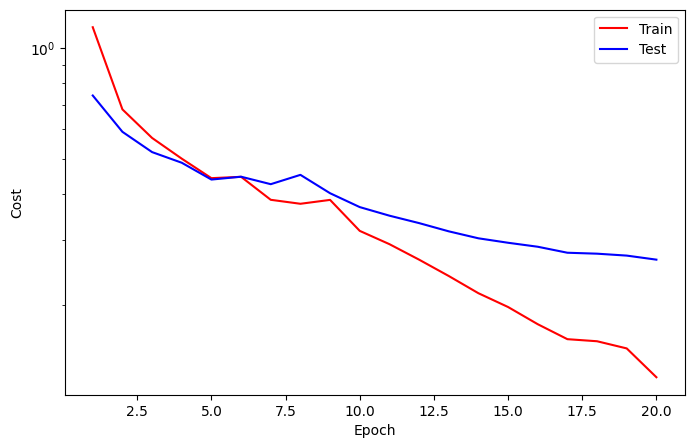

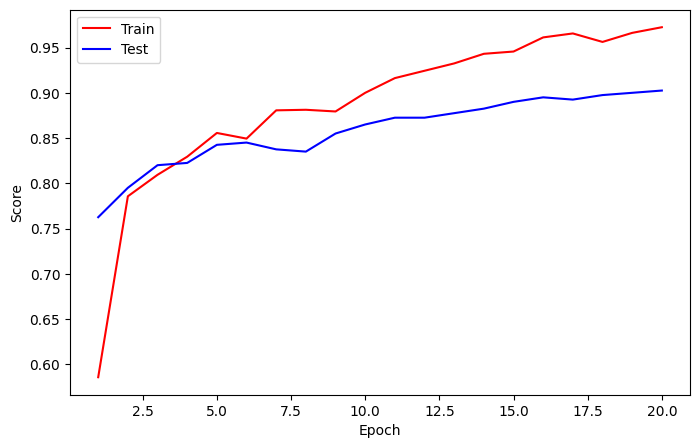

Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.1265 | Test_cost  = 0.2612 | Train_score = 0.9725 | Test_score = 0.9100 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.1200 | Test_cost  = 0.2557 | Train_score = 0.9706 | Test_score = 0.9100 |
==> EarlyStop patience =  1 | Best test_score: 0.9100


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.1052 | Test_cost  = 0.2575 | Train_score = 0.9775 | Test_score = 0.9075 |
==> EarlyStop patience =  2 | Best test_score: 0.9100


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.0959 | Test_cost  = 0.2499 | Train_score = 0.9794 | Test_score = 0.9200 |


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c7ae05e3c40>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7c7ae05e3c40>Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
Traceback (most recent call last):
    self._shutdown_workers()  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__

      File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
self._shutdown_workers()    
if w.is_alive():
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
      if w.is_alive(): 
     ^ ^ ^^   ^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive

      File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
assert self._par

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.0876 | Test_cost  = 0.2483 | Train_score = 0.9850 | Test_score = 0.9075 |
==> EarlyStop patience =  1 | Best test_score: 0.9200


Train:   0%|          | 0/25 [01:41<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.0800 | Test_cost  = 0.2439 | Train_score = 0.9881 | Test_score = 0.9125 |
==> EarlyStop patience =  2 | Best test_score: 0.9200


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.0817 | Test_cost  = 0.2428 | Train_score = 0.9844 | Test_score = 0.9150 |
==> EarlyStop patience =  3 | Best test_score: 0.9200


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.0786 | Test_cost  = 0.2390 | Train_score = 0.9844 | Test_score = 0.9150 |
==> EarlyStop patience =  4 | Best test_score: 0.9200


Train:   0%|          | 0/25 [00:00<?, ?it/s]

Test:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.0669 | Test_cost  = 0.2396 | Train_score = 0.9894 | Test_score = 0.9200 |
==> EarlyStop patience =  5 | Best test_score: 0.9200
==> Execute Early Stopping at epoch: 29 | Best test_score: 0.9200
==> Best model is saved at /content/model


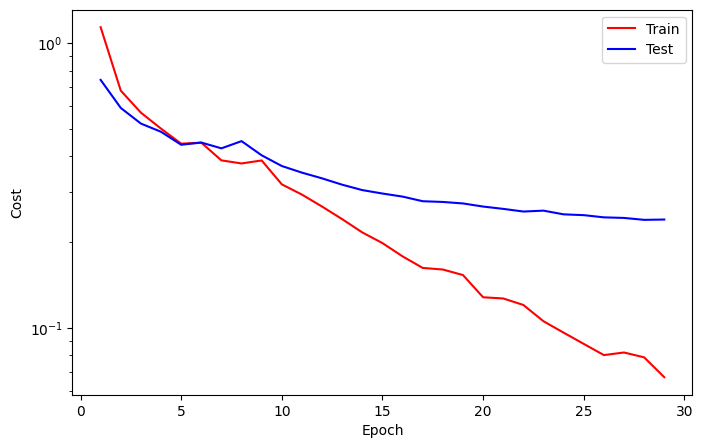

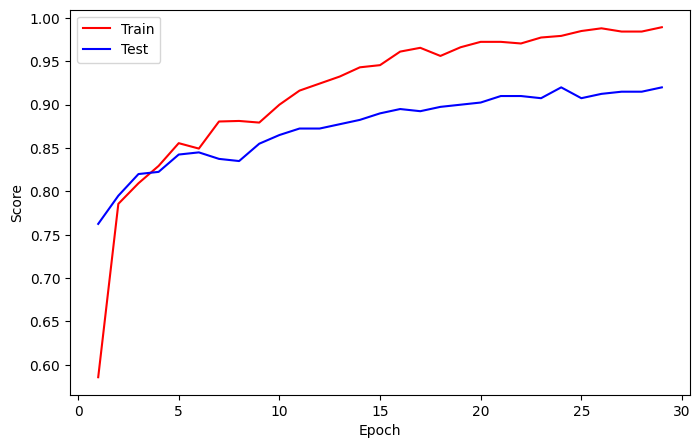

In [ ]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    #Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    #Checkpoint
    callback.save_checkpoint()

    #Runntime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    #Early stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break


Predict

In [ ]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [ ]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

tensor([3, 4, 2, 1, 1, 1, 2, 0, 0, 4, 4, 1, 2, 2, 3, 4, 3, 3, 3, 4, 4, 0, 1, 2,
        1, 4, 2, 0, 3, 1, 4, 1, 4, 1, 1, 0, 1, 0, 3, 2, 1, 3, 0, 3, 2, 1, 3, 1,
        0, 4, 4, 0, 4, 2, 3, 1, 4, 4, 2, 2, 3, 2, 2, 0], device='cuda:0')

Sanity Check

Denormalisasi

In [ ]:
def inverse_norm(img):
  img[0, :, :] = img[0, :, :] * 0.229 + 0.485
  img[1, :, :] = img[1, :, :] * 0.224 + 0.456
  img[2, :, :] = img[2, :, :] * 0.225 + 0.406
  return img

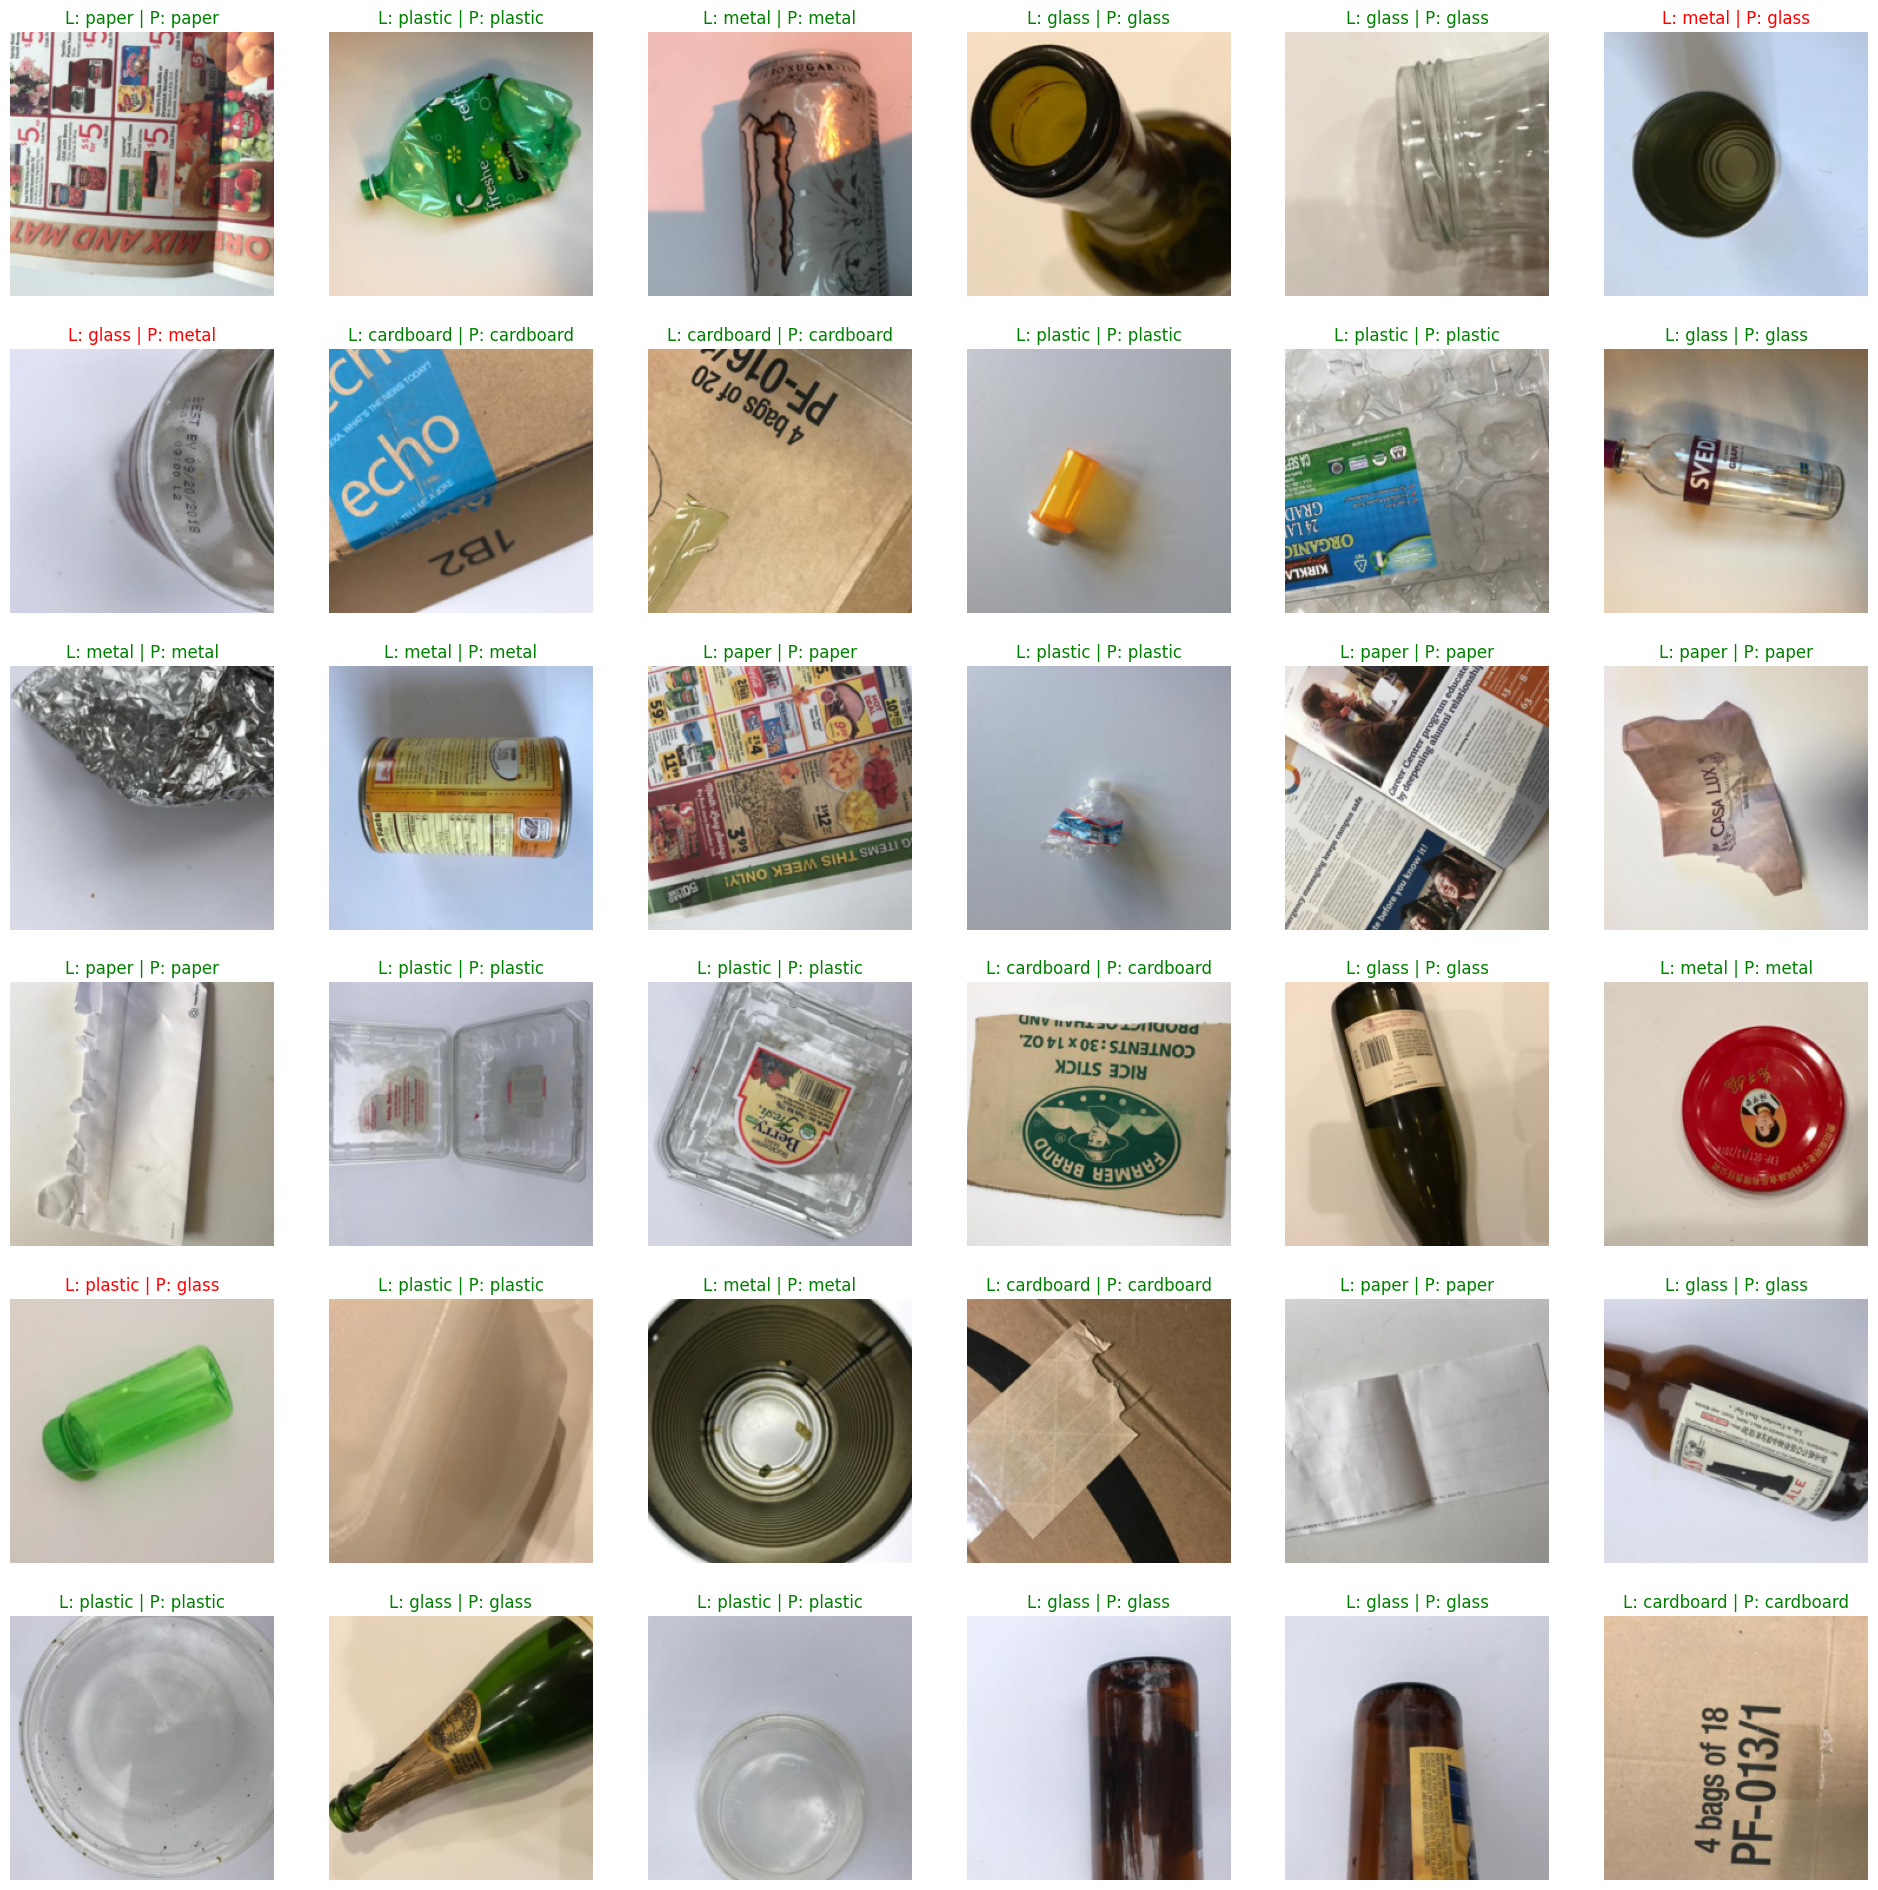

In [ ]:
fig, axes = plt.subplots(6,6, figsize=(24,24))
for image, label, pred, ax in zip(feature, target, preds, axes.flatten ()):
    ax.imshow(inverse_norm(image).permute(1,2,0).cpu())
    font = {"color": 'r'} if label != pred else {"color": 'g'}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"L: {label} | P: {pred}", fontdict=font);
    ax.axis('off');


Menyimpan Weight Setelah training

In [ ]:
import shutil

# Path folder yang ingin dikompres
folder_path = '/content/model'

# Nama file zip yang akan dibuat
zip_file_path = '/content/model.zip'

# Membuat file zip
shutil.make_archive(base_name=zip_file_path.replace('.zip', ''), format='zip', root_dir=folder_path)

print(f'Folder "{folder_path}" telah berhasil dikompres menjadi: {zip_file_path}')

Folder "/content/model" telah berhasil dikompres menjadi: /content/model.zip


Load model dengan weight yang sudah ada

In [ ]:
!gdown https://drive.google.com/uc?id=1KyOIz6fdARa_2nan4Git1GdzAVhWIRuo
!unzip /content/model_transferlearning.zip

Downloading...
From: https://drive.google.com/uc?id=1KyOIz6fdARa_2nan4Git1GdzAVhWIRuo
To: /content/model_transferlearning.zip
100% 8.43M/8.43M [00:00<00:00, 26.0MB/s]
Archive:  /content/model_transferlearning.zip
  inflating: model/configs.pth       
  inflating: model/logs.pth          
  inflating: model/weights_best.pth  


In [ ]:
import os

model = CustomMobilenetV2(config.output_size).to(device)
checkpoint_path = "/content/model/weights_best.pth"

if os.path.exists(checkpoint_path):
    print("✅ Model checkpoint ditemukan. Memuat model...")
    model.load_state_dict(torch.load(checkpoint_path, map_location=device))
    model.eval()
else:
    print("⚠️  Model belum ditemukan. Akan dilakukan training...")

✅ Model checkpoint ditemukan. Memuat model...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
